In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import matplotlib.font_manager as fm
plt.style.use('dark_background')

### 코로나 전,후 각 OTT 회사별 MAU, 매출액 변화
- 코로나로 인해서 사회적 거리를 두고 집에 있는 시간이 늘면서 OTT 수요가 폭발적으로 늘어났다.
- 코로나 전,후 상황으로 매출과 국내 월평균 순이용자(Montly Active Users,MAU) 비교해보면 모두 증가했다.
- 특정 OTT 회사의 증가율을 더 가파른것을 확인 할 수 있다.

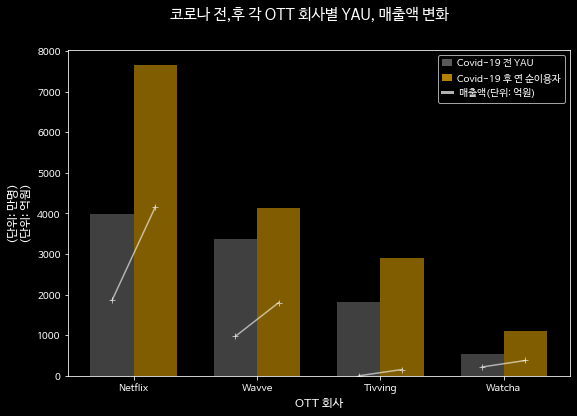

In [61]:
ott_mau=pd.DataFrame({   
     'name':['Netflix','Wavve','Tivving','Watcha'],
     'before_covid': [332,281.5,151.2 ,45.5],
     'after_covid': [637.5,344.2,241,92.6]
})
ott_mau.before_covid=ott_mau.before_covid*12
ott_mau.after_covid=ott_mau.after_covid*12

ott_sales=pd.DataFrame({   
     'name':['Netflix','Wavve','Tivving','Watcha'],
     'sales_bofore': [1859 ,973,0,218],
     'sales_after': [4155 ,1802,155,377]

    })
ott_sales_grouped=zip(ott_sales[['sales_bofore']].values,ott_sales[['sales_after']].values)

width=0.35
x = np.arange(len(ott_mau.name)) 
fig, ax = plt.subplots(figsize=(9,6))

ax.bar(x-width/2,ott_mau.before_covid,width, label='before Covid',alpha=0.5, color='gray' )
ax.bar(x+width/2,ott_mau.after_covid,width, label='after Covid' ,alpha=0.5, color='#FFBB00')

for i in range(len( ott_mau.name)):
    ax.plot(
        [x[i] - width / 2, x[i] + width / 2], 
        [ott_sales.sales_bofore.iloc[i] , ott_sales.sales_after.iloc[i]], 
        color='white', marker='+',alpha=.6)
legend_elements = [ Patch(facecolor='gray',alpha=0.7),
                    Patch(facecolor='#FFBB00',alpha=0.7),
                    Line2D([0], [0], color='white',alpha=0.7, lw=3),
]
plt.legend(handles=legend_elements,labels=['Covid-19 전 YAU','Covid-19 후 연 순이용자',' 매출액(단위: 억원)'],
            handletextpad=0.5, handlelength=1.0)
plt.xticks([ r/2 for r in range(0,len(ott_sales.name )*2,2)], ott_sales.name )

fig.suptitle('코로나 전,후 각 OTT 회사별 YAU, 매출액 변화 ', 
             fontsize=15)
plt.xlabel('OTT 회사',fontsize=12)
plt.ylabel('(단위: 만명)\n(단위: 억원)',fontsize=12)
colors = ["#FFBB00", "gray"]

### 스트림 양상 비교
- 같은 스트림 서비스이나 서비스의 성격이 다른 youtube, Netflix 의 코로나 영향 확인
- 결제금액은 비즈니스 모델이 서로 다르기 때문에 직접 비교는 어렵지만 코로나 이후에는 넷플릭스는 가파르게 상승하고, 유튜브는 하락

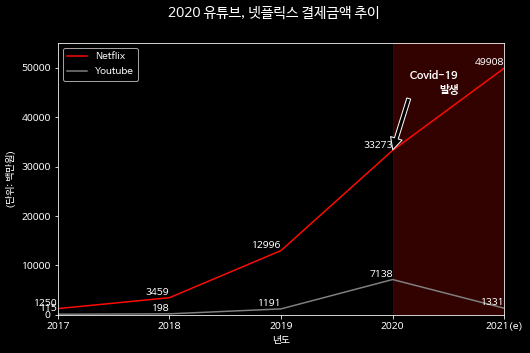

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
df=pd.DataFrame({
    'year':['2017','2018','2019','2020','2021(e)'],
    'Netflix':[1250,3459,12996,33273,49908],
    'Youtube': [115,198,1191,7138,1331]
})

fig.suptitle('2020 유튜브, 넷플릭스 결제금액 추이', 
             fontsize=14)
plt.xlabel('년도')
plt.ylabel('(단위: 백만원)')
colors = ["#FFBB00", "gray"]

sns.set_palette(sns.color_palette(colors))
ax=sns.lineplot(data=df,x='year' , y= 'Netflix',
                color='#FF0B04',sort=True)
ax=sns.lineplot(data=df,x='year' , y= 'Youtube',
                color='gray',sort=True)

for i in range(5):
  ax.annotate(df.Netflix[i],(i, df.Netflix[i]),
              horizontalalignment='right', verticalalignment='bottom')
  ax.annotate(df.Youtube[i],(i, df.Youtube[i]), 
              horizontalalignment='right', verticalalignment='bottom')


ax.annotate('Covid-19 \n발생',(3, df.Netflix[3]),
            xytext=(0.9, 0.9), textcoords='axes fraction',
             arrowprops=dict(facecolor='black', shrink=.01 ),
            fontsize=11,weight='bold', 
            horizontalalignment='right', verticalalignment='top')

ax.axvspan(3,5, color='#FF0B04', alpha=0.2)
ax.set_xlim(0, 4)
ax.set_ylim(0, 55000)

plt.legend(labels=['Netflix','Youtube'])


### 국내 OTT 시장 규모
- 시장규모와 매출액 상승
- 점점 더 가파르게 성장

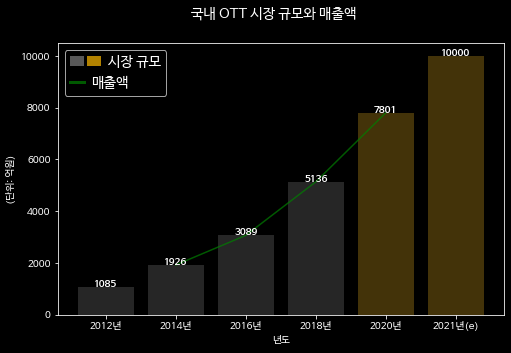

In [ ]:

df2=pd.DataFrame({   
     'year':['2012년','2014년','2016년','2018년','2020년','2021년(e)'],
    'mkt_size': [1085,1926,3089,5136,7801,10000]
    })

growth=pd.DataFrame({   
     'year':['2012년','2014년','2016년','2018년','2020년(e)'],
     'sales_rev': [None ,1926,3069,5136,7801]
    })


#legend custom

fig, ax = plt.subplots(figsize=(8,5))


sns.barplot(data=df2, x='year',y='mkt_size',
            palette= ["#FFBB00" if x >= 7000 else 'gray' for x in df2.mkt_size ],alpha=0.3)
           
#annotation
for i in range(len(df2.mkt_size)): 
  plt.text(i, df2.mkt_size[i],df2.mkt_size[i],
           horizontalalignment='center',weight='bold' )

sns.lineplot(x=growth['year'],y=growth['sales_rev'],
             color='green',alpha=0.7)


legend_elements = [ Patch(facecolor='gray',alpha=0.7),
                    Line2D([0], [0], color='green',alpha=0.7, lw=3),
                    Patch(facecolor='#FFBB00',alpha=0.7),
]

plt.legend(handles=legend_elements,labels=['','매출액','시장 규모'],
           prop={'family':font_name.get_name(), 'size':14},
           ncol=2, handletextpad=0.5, handlelength=1.0, columnspacing=-3,
)
fig.suptitle('국내 OTT 시장 규모와 매출액', fontsize=14)
plt.xlabel('년도',  )
plt.ylabel('(단위: 억원)')
plt.xticks( )
plt.show()

### 통계 데이터
- 방송통계포털 2020년 통계자료 사용

In [ ]:

ott_platform = pd.read_csv('/content/OTT__2020.csv')
ott_mktshr = pd.read_csv('../content/OTT____20192020.csv')

print(ott_platform.info(),ott_mktshr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분별(1)   11 non-null     object
 1   구분별(2)   11 non-null     object
 2   2020     11 non-null     object
 3   2020.1   11 non-null     object
 4   2020.2   11 non-null     object
 5   2020.3   11 non-null     object
 6   2020.4   11 non-null     object
 7   2020.5   11 non-null     object
 8   2020.6   11 non-null     object
 9   2020.7   11 non-null     object
 10  2020.8   11 non-null     object
 11  2020.9   11 non-null     object
 12  2020.10  11 non-null     object
 13  2020.11  11 non-null     object
 14  2020.12  11 non-null     object
dtypes: object(15)
memory usage: 1.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분별(1)  11 non-null     object
 1   구분별(2)  11 n

In [ ]:
display(ott_platform.head(11),ott_mktshr.head())

,구분별(1),구분별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9,2020.10,2020.11,2020.12
0,구분별(1),구분별(2),사례수 (명),U+모바일 TV (%),Tving (%),V live (%),아프리카 TV (%),왓챠플레이 (%),곰TV (%),유튜브 (%),넷플릭스 (%),Wavve (%),시즌 (%),기타 (%),이용한적 없음 (%)
1,전체,소계,3999,1.1,1.5,0.1,0.3,0.3,0.0,8.2,11.6,2.3,0.5,0.0,78.3
2,성별,남자,2087,1.3,1.9,0.0,0.4,0.2,0.0,9.1,10.8,2.5,0.4,0.0,77.3
3,성별,여자,1912,0.8,1.1,0.3,0.1,0.5,0.1,7.2,12.4,2.2,0.6,0.1,79.3
4,연령,10대,453,3.1,1.1,0.0,0.5,0.1,0.0,6.1,11.4,0.9,2.1,0.0,79.6
5,연령,20대,835,1.7,2.1,0.6,0.7,1.2,0.0,11.7,18.1,5.1,0.8,0.0,66.6
6,연령,30대,831,0.9,2.8,0.0,0.1,0.3,0.1,8.6,20.2,4.2,0.4,0.0,69.9
7,연령,40대,800,0.9,0.7,0.0,0.0,0.0,0.0,7.6,7.6,0.9,0.0,0.0,82.4
8,연령,50대,713,0.0,1.3,0.0,0.1,0.0,0.0,6.1,3.4,0.6,0.0,0.2,89.6
9,연령,60대,294,0.0,0.0,0.0,0.0,0.0,0.0,7.3,1.5,0.0,0.0,0.0,91.3


,구분별(1),구분별(2),2019,2019.1,2019.2,2020,2020.1,2020.2
0,구분별(1),구분별(2),사례수 (명),이용한 적이 있다 (%),이용한 적이 없다 (%),사례수 (명),이용한 적이 있다 (%),이용한 적이 없다 (%)
1,전체,소계,3316,92.5,7.5,3999,93.6,6.4
2,성별,남자,1771,91.8,8.2,2087,93.6,6.4
3,성별,여자,1544,93.3,6.7,1912,93.7,6.3
4,연령,10대,506,89.4,10.6,453,95.7,4.3


In [ ]:
tmp=ott_platform.melt( id_vars=['구분별(2)'],var_name='구분',value_name='시청수')
tmp=tmp[tmp['시청수'].str.isnumeric()][1:]
tmp.head(20)

,구분별(2),구분,시청수
13,남자,2020,2087
14,여자,2020,1912
15,10대,2020,453
16,20대,2020,835
17,30대,2020,831
18,40대,2020,800
19,50대,2020,713
20,60대,2020,294
21,70세 이상,2020,72


In [ ]:
tmp['시청수']=pd.to_numeric(tmp['시청수'])
tmp['prop']=round(tmp['시청수']/tmp['시청수'][:2].sum(),3)
tmp[2:].prop

15    0.113
16    0.209
17    0.208
18    0.200
19    0.178
20    0.074
21    0.018
Name: prop, dtype: float64

In [ ]:
list( 'maroon' if x >=0.15  else 'gray' for x in tmp.iloc[2:].prop)

['gray', 'maroon', 'maroon', 'maroon', 'maroon', 'gray', 'gray']

### OTT 구독자 파악
- 연령은 20~50대가 주
- 성별 영향은 거의 없다

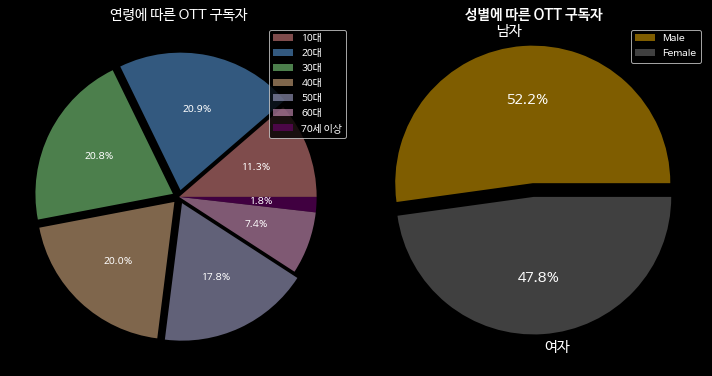

In [ ]:
fig, axes = plt.subplots(2,1, figsize=(10, 8))
sorted_views=tmp[2:].sort_values( by='시청수',ascending=False)
plt.subplot(1,2, 1)               
plt.title('연령에 따른 OTT 구독자', fontsize=14)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','purple']

pie_chart1=plt.pie(tmp.iloc[2:]['시청수'],
        colors=colors,
        explode=tuple( ( 0.05 if x >=0.15  else 0 for x in tmp.iloc[2:].prop )),
autopct='%.1f%%')

for i in range(len(pie_chart1[0])):
    pie_chart1[0][i].set_alpha(0.5)
    
plt.legend(tmp.iloc[2:]['구분별(2)'],loc='upper right')

plt.subplot( 1,2,2)       
pie_chart2=plt.pie(tmp.iloc[:2].sort_values( by='시청수',ascending=False)['시청수'], 
       textprops={'size': 'x-large','color':'white','family':font_name.get_name()},labels=['남자','여자'],
        explode=tuple( ( 0.1 if x >=0.5  else 0 for x in tmp.iloc[:2].prop )),
        colors= list('#FFBB00' if x >=0.5  else 'gray' for x in tmp.iloc[:2].prop),
        autopct='%.1f%%')

for i in range(len(pie_chart2[0])):
    pie_chart2[0][i].set_alpha(0.5)
    
plt.tight_layout()

plt.title('성별에 따른 OTT 구독자', fontsize=14, weight='bold')

plt.legend(['Male','Female'])
plt.show()


In [ ]:
ott_mktshr=ott_mktshr.iloc[1:,1:]
ott_mktshr_prop=ott_mktshr[['구분별(2)','2019','2020']]
ott_mktshr_prop[['2019','2020']] = ott_mktshr_prop[['2019','2020']].apply(pd.to_numeric)
ott_mktshr[['2019.1','2020.1']] = ott_mktshr[['2019.1','2020.1']].apply(pd.to_numeric)
ott_mktshr_prop,ott_mktshr

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(    구분별(2)  2019  2020
 1       소계  3316  3999
 2       남자  1771  2087
 3       여자  1544  1912
 4      10대   506   453
 5      20대   783   835
 6      30대   764   831
 7      40대   658   800
 8      50대   407   713
 9      60대   168   294
 10  70세 이상    29    72,     구분별(2)  2019  2019.1 2019.2  2020  2020.1 2020.2
 1       소계  3316    92.5    7.5  3999    93.6    6.4
 2       남자  1771    91.8    8.2  2087    93.6    6.4
 3       여자  1544    93.3    6.7  1912    93.7    6.3
 4      10대   506    89.4   10.6   453    95.7    4.3
 5      20대   783    94.5    5.5   835    94.9    5.1
 6      30대   764    92.9    7.1   831    94.9    5.1
 7      40대   658    92.8    7.2   800    93.3    6.7
 8      50대   407    93.9    6.1   713    90.3    9.7
 9      60대   168    86.6   13.4   294    93.0    7.0
 10  70세 이상    29    91.3    8.7    72    91.0    9.0)

In [ ]:

ott_mktshr_prop['2020']=round(ott_mktshr_prop['2020']*ott_mktshr['2020.1']/100 )
ott_mktshr_prop['2019']=round(ott_mktshr_prop['2019']*ott_mktshr['2019.1']/100)
ott_mktshr_prop['change']=(ott_mktshr_prop['2020']-ott_mktshr_prop['2019']) /ott_mktshr_prop['2019']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

### 코로나 전,후 연령 증감추이
- 10대 제외하고 모두 증가
- 특히 높은 연령의 증가율이 큼

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

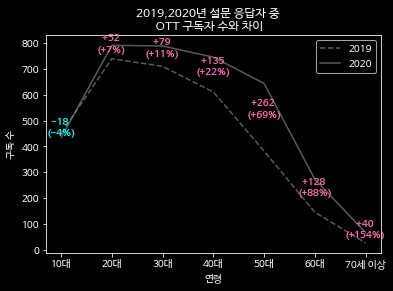

In [ ]:
sns.lineplot(data=ott_mktshr_prop[3:],x='구분별(2)',y='2019',color='gray', linestyle='dashed',alpha=.7)
sns.lineplot(data=ott_mktshr_prop[3:],x='구분별(2)',y='2020', color='gray',alpha=.7)
plt.legend(labels=['2019','2020'])

for i in range(len(ott_mktshr_prop[3:])): 
  if ott_mktshr_prop['2020'][3:].iloc[i] - ott_mktshr_prop['2019'][3:].iloc[i] > 0:
    plt.text(  i,    ott_mktshr_prop['2019'][3:].iloc[i]  +  (ott_mktshr_prop['2020'][3:].iloc[i] - ott_mktshr_prop['2019'][3:].iloc[i])/2,
            f"+{(ott_mktshr_prop['2020'][3:].iloc[i] - ott_mktshr_prop['2019'][3:].iloc[i] ):.0f} \n(+{ott_mktshr_prop['change'][3:].iloc[i]*100:.0f}%)",
            horizontalalignment='center',weight='bold', color='hotpink')
  else:
     plt.text(  i,    ott_mktshr_prop['2019'][3:].iloc[i]  +  (ott_mktshr_prop['2020'][3:].iloc[i] - ott_mktshr_prop['2019'][3:].iloc[i])/2,
            f"{(ott_mktshr_prop['2020'][3:].iloc[i] - ott_mktshr_prop['2019'][3:].iloc[i] ):.0f} \n({ott_mktshr_prop['change'][3:].iloc[i]*100:.0f}%)",
            horizontalalignment='center',weight='bold', color='cyan')
plt.suptitle('2019,2020년 설문 응답자 중\n OTT 구독자 수와 차이', fontsize=12)
plt.xlabel('연령')
plt.ylabel('구독 수')
plt.xticks( )


In [ ]:
ott_mktshr_prop['prop_19']=ott_mktshr_prop['2019']/ott_mktshr_prop['2019'].iloc[0]
ott_mktshr_prop['prop_20']=ott_mktshr_prop['2020']/ott_mktshr_prop['2020'].iloc[0]

ott_mktshr_prop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,구분별(2),2019,2020,change,prop_19,prop_20
1,소계,3067.0,3743.0,0.220411,1.000000,1.000000
2,남자,1626.0,1953.0,0.201107,0.530160,0.521774
3,여자,1441.0,1792.0,0.243581,0.469840,0.478760
4,10대,452.0,434.0,-0.039823,0.147375,0.115950
5,20대,740.0,792.0,0.070270,0.241278,0.211595
6,30대,710.0,789.0,0.111268,0.231497,0.210793
7,40대,611.0,746.0,0.220949,0.199217,0.199305
8,50대,382.0,644.0,0.685864,0.124552,0.172055
9,60대,145.0,273.0,0.882759,0.047277,0.072936
10,70세 이상,26.0,66.0,1.538462,0.008477,0.017633


### 코로나 전,후 구독자 수
- 증가

In [ ]:
ott_mktshr_1920_melted=ott_mktshr_prop.melt( id_vars=['구분별(2)'],var_name='년도',value_name='사례수')

Text(0, 0.5, '구독 수')

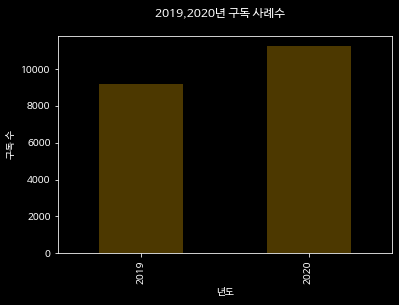

In [ ]:
ott_mktshr_1920_melted['사례수']=pd.to_numeric(ott_mktshr_1920_melted['사례수'])
ott_mktshr_1920_melted[ott_mktshr_1920_melted['년도'].str.isnumeric()].groupby('년도').sum().plot.bar( alpha=0.3,legend=False)

plt.suptitle('2019,2020년 구독 사례수', fontsize=12)
plt.xlabel('년도')
plt.ylabel('구독 수')


### OTT 시장 점유율
- Netflix가 독점
- 국내 OTT 시장점유율 낮음
- Disney + 이미 국내 시장 진입, Amazon Prime Video 는 SKT와 손잡고 들어올 계획 중
- 막강한 오리지널 컨텐츠 때문에 국내 시장에 영향을 더 줄 것으로 봄 ( 해외 사례에서도 후발주자임에도 주요 3,4개 회사가 점점 독점하게 됨)

In [ ]:
!pip install squarify 
import squarify 
import matplotlib

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

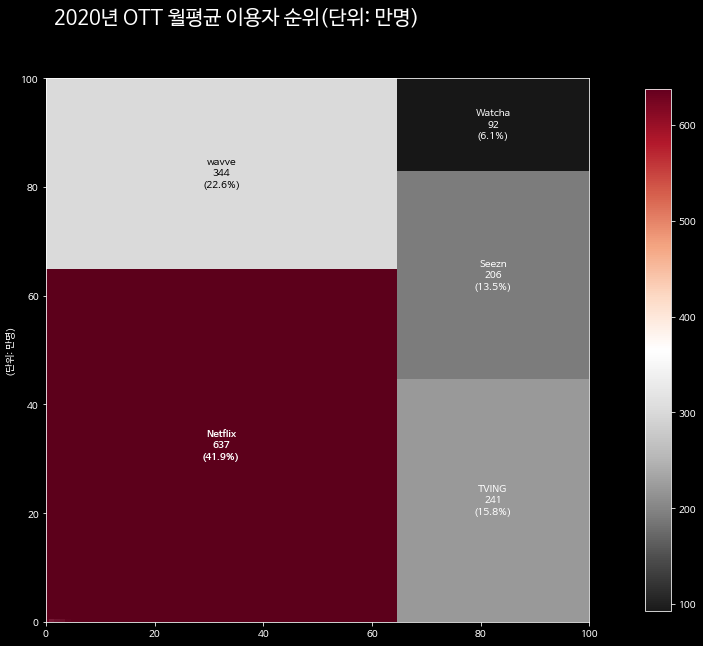

In [ ]:
df1=pd.DataFrame({
    'platform':['Netflix','wavve','TVING','Seezn','Watcha'],
    'user':[637.5,344.2,241,206.1,92.6],
})
fig = plt.figure(figsize=(20, 10))

cmap = matplotlib.cm.get_cmap('RdGy_r') #reverse mode
mini,maxi=min(df1["user"]),max(df1["user"])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in df1["user"]]

labels=["%s\n%d\n(%.1f%%)" % (x,y,z*100) for x,y,z in zip(df1.platform,df1.user,df1.user/sum(df1.user))]
ax=squarify.plot(sizes=df1.user, label=labels, alpha=.9,color=colors )
ax.texts[0].set_weight('bold')
ax.texts[1].set_color('black')

img = plt.imshow([df1["user"]], cmap=cmap)
fig.colorbar(img, orientation="vertical", shrink=.96)

plt.suptitle("2020년 OTT 월평균 이용자 순위(단위: 만명)", fontsize=20)
plt.xlabel('')
plt.ylabel('(단위: 만명)')
plt.xticks( )

### 넷플릭스 앱 신규설치자
- 정말 오리지널 컨텐츠의 영향이 있는지 보았는데 특정 유명세 탄 컨텐츠가 릴리즈 된 이후 신규 유입 폭발함


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

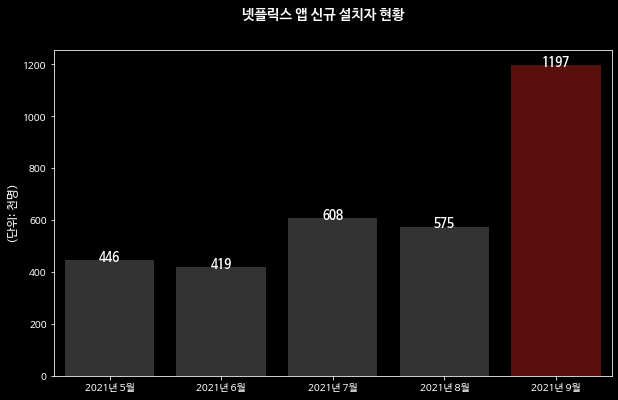

In [ ]:

dnetflix_9=pd.DataFrame({   
     'year':['2021년 5월','2021년 6월','2021년 7월','2021년 8월','2021년 9월'],
    'new_user': [446,419,608,575,1197]
    })

fig = plt.figure(figsize=(10, 6))

sns.barplot(data=dnetflix_9,x='year',y='new_user'
,palette= ["#FF0B04" if x > 1000 else 'gray' for x in dnetflix_9.new_user ],alpha=.4)
  

for i in range(len(dnetflix_9.new_user)): 
  plt.text(i, dnetflix_9.new_user[i],dnetflix_9.new_user[i],
           horizontalalignment='center',weight='bold',fontsize=12 )

plt.suptitle('넷플릭스 앱 신규 설치자 현황', fontsize=14,weight='bold')
plt.xlabel('', fontsize=12)
plt.ylabel('(단위: 천명)',fontsize=12)
plt.xticks(fontsize=10)

In [ ]:
# !pip install -U kaleido

In [ ]:
# # !pip install plotly==5.5.0
# #!pip install -U kaleido
# import plotly.express as px
# import pandas as pd


# dnetflix_9=pd.DataFrame({   
#      'year':['2021년 5월','2021년 6월','2021년 7월','2021년 8월','2021년 9월'],
#     'new_user': [446,419,608,575,1197]
#     })
# #넷플릭스 오리지널 DP, 오징어게임으로 9월에 
# fig = px.bar(x=dnetflix_9.year,y=dnetflix_9.new_user)
# fig.show()
# # fig.write_html("netflix_sep.html")
# fig.write_image("netflix_sep.png")

# # palette= ["#FF0B04" if x > 1000 else '#4374B3' for x in dnetflix_9.new_user ]).set(Title='Netflix 앱 신규 설치자 현황',xlabel='',ylabel='(단위: 천명)')